#Format Data for Experiment in ABM environment

In [1]:
#Import Packages
#Needed for moving to output
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as pl
import itertools
from collections import Counter
import pickle

from vivarium.library.units import units, remove_units
from tumor_tcell.library.phylogeny import get_phylogeny
from tumor_tcell.experiments.main import plots_suite


#Analysis tumor-tcell modules needed
from tumor_tcell.library.data_process import data_to_dataframes
from tumor_tcell.library.population_analysis import division_analysis
from tumor_tcell.library.population_plots import population_plot
from tumor_tcell.library.population_plots import division_plot
from tumor_tcell.library.population_plots import death_plot

Loading chipmunk for Linux (64bit) [/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/vivarium_env/lib/python3.8/site-packages/pymunk/libchipmunk.so]


In [2]:
#Read in the data from parent directory
analysis_dir = '/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/out/analysis/'
experiment_id = 'tumor_tcell_20210506.181623/'
experiment_dir = analysis_dir+experiment_id
os.chdir(experiment_dir)
figures_out_dir = experiment_dir + 'figures'
os.makedirs(figures_out_dir, exist_ok=True)
os.getcwd()

'/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/out/analysis/tumor_tcell_20210506.181623'

In [3]:
file_to_read = open("data_export.pkl", "rb")
data = pickle.load(file_to_read)
data;

## Single Cell

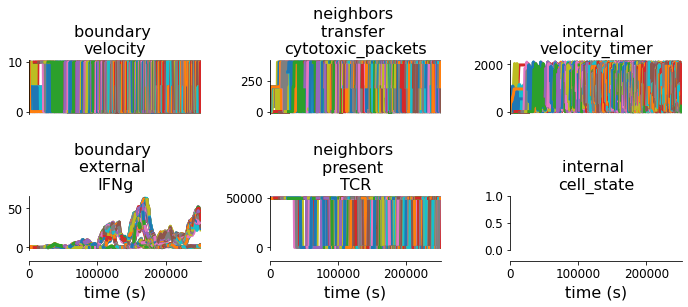

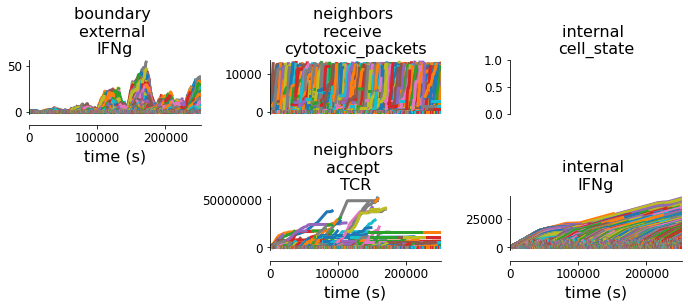

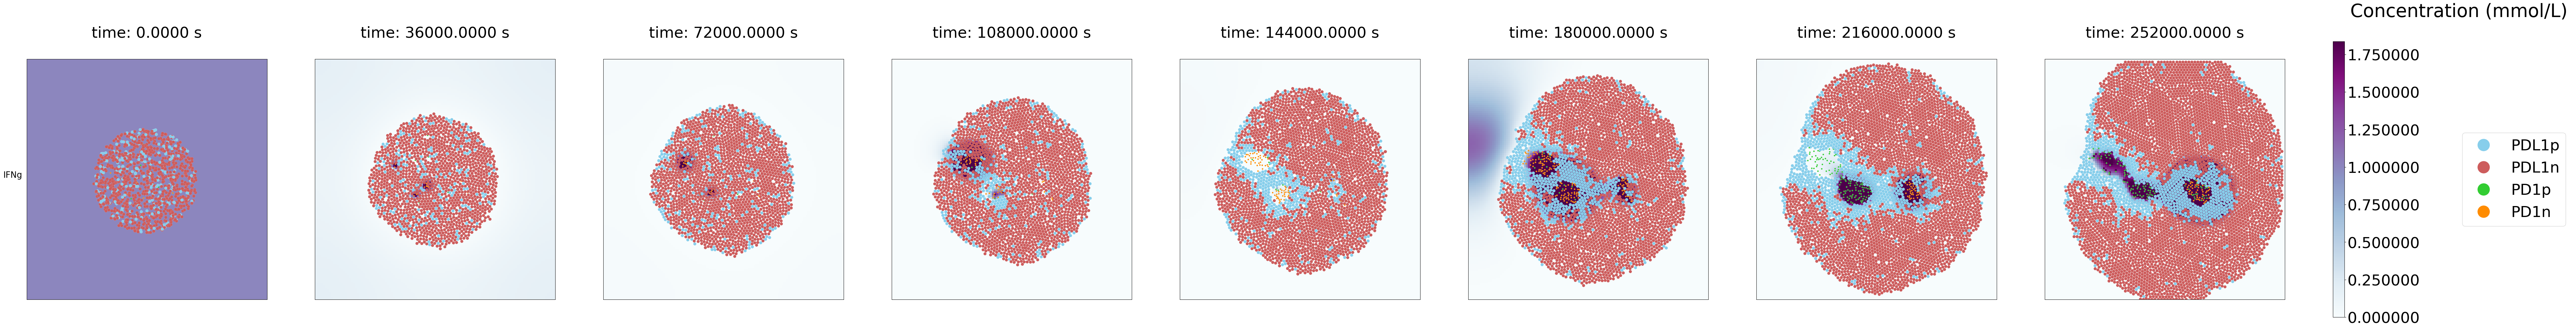

In [4]:
# #Plot the data using tumor-tcell experiment notebook and save in current directory
bounds = [1200,1200]
fig1, fig2, fig3 = plots_suite(data, out_dir = figures_out_dir, bounds=[b*units.um for b in bounds])

## Population Level

In [5]:
df_tumor_death, df_tcell_death, tumor_plot, tcell_plot = data_to_dataframes(data)

/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/tumor_tcell/library/data_process.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tcell_death.sort_values(by=['time'], inplace=True)
/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/tumor_tcell/library/data_process.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tcell_death[death_type] = df_tcell_death['death'].apply(lambda x: 1 if x == death_type else 0)
/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/tumor_tcell/library/data_process.py:130: SettingWithCopyWarning: 
A value is trying to 

In [ ]:
divide_time_T = division_analysis(tcell_plot)

In [ ]:
divide_time_tumor = division_analysis(tumor_plot)

In [ ]:
division_plot(divide_data = divide_time_T, out_dir = figures_out_dir, save_name='Tcells')

In [ ]:
division_plot(divide_data = divide_time_tumor, out_dir = figures_out_dir, save_name='Tumors')

In [ ]:
population_plot(population_data = tumor_plot, cell_states = ['PDL1n','PDL1p'], out_dir=figures_out_dir, save_name='Tumors')

In [ ]:
population_plot(population_data = tcell_plot, cell_states = ['PD1n','PD1p'], out_dir=figures_out_dir, save_name='Tcells')

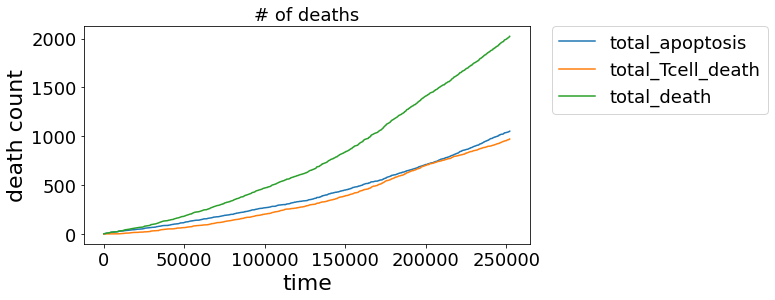

In [8]:
death_plot(death_data = df_tumor_death, out_dir=figures_out_dir, save_name='Tumors')

In [ ]:
death_plot(death_data = df_tcell_death, out_dir=figures_out_dir, save_name='Tcells')

In [11]:
#Export the dataframes for analysis comparison to other experiments and not need to process again
df_tumor_death['experiment_id'] = experiment_id
df_tcell_death['experiment_id'] = experiment_id
tumor_plot['experiment_id'] = experiment_id
tcell_plot['experiment_id'] = experiment_id

df_tumor_death.to_csv('tumor_death.csv')
df_tcell_death.to_csv('tcell_death.csv')
tumor_plot.to_csv('tumor_plot.csv')
tcell_plot.to_csv('tcell_plot.csv')

## Extra Spatial and Single Cell Plots

In [ ]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

pl.rc('font', size=SMALL_SIZE)          # controls default text sizes
pl.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
pl.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
pl.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pl.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
pl.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

os.chdir(figures_out_dir)

In [ ]:
#reset index for plotting
tcell_plot = tcell_data_form.reset_index()
tcell_plot.velocity = tcell_plot.velocity.astype(float)
# plot the data to analyze
plotting_columns = ['IFNg', 'TCR', 'velocity', 'transferable_cytotoxic_packets']
for column in plotting_columns:
    pl.figure(figsize=(8, 4))
    column_1 = sns.lineplot(data=tcell_plot, x="time", y=column, style = 'cell_state', hue="cell", legend = None)
    #pl.savefig(column+'_t_cell.png', format='png', bbox_inches='tight', dpi=300)

In [ ]:
#Spatial
pl.figure(figsize=(5, 5))
XandY = sns.lineplot(data=tcell_plot, x="X", y="Y", style = 'cell_state', hue="cell", legend = None)

In [ ]:
#reset index for plotting
tumor_plot = tumor_data_form.reset_index()

# plot the data to analyze
plotting_columns = ['TCR_neighbor', 'IFNg', 'cytotoxic_packets']
for column in plotting_columns:
    pl.figure(figsize=(8, 4))
    column_1 = sns.lineplot(data=tumor_plot, x="time", y=column, style = 'cell_state', hue="cell", legend = None)
    #pl.savefig(column+'_tumor.png', format='png', bbox_inches='tight', dpi=300)

#Spatial Widget

In [ ]:
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
# %matplotlib inline

# def plot_func(time):
#     x = tcell_plot[tcell_plot['time']<=time]['X']
#     y = tcell_plot[tcell_plot['time']<=time]['Y']
#     data_t = tcell_plot[tcell_plot['time']<=time]
#     xandy = sns.lineplot(data=data_t, x=x, y=y, hue = 'cell_state', style = 'cell', legend = None)
#     pl.show()

# interact(plot_func, time = widgets.FloatSlider(value=0,
#                                                min=0,
#                                                max=10000,
#                                                step=60))

In [ ]:
tcell_plot.X.min()

In [ ]:
tcell_plot.Y.min()